# Proyek Analisis Data: Bike Sharing
- **Nama:** Khalif Umar Al Faruq
- **Email:** Khalifumardev@gmail.com
- **ID Dicoding:** khalif umar al faruq

## Menentukan Pertanyaan Bisnis 


- Bagaimana performa pengguna sepeda ketika cuaca atau musim selama 2 tahun (2011-2012)?
- Apakah penggunaan sepeda masih ngetrend di beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

## Data Wrangling

### Gethering Data

**Membaca File day.csv dan hour.csv**

In [3]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
hour_df = pd.read_csv("data/hour.csv", delimiter=",")

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Secara umum, data masih sulit untuk dibaca karena data masih dalam bentuk numerik

### Assesing Data day.csv dan hour.csv

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Data-data sudah dipastikan tidak ada missing value karena semuanya menampilkan 0

In [8]:
jumlah_duplikasi_day = day_df.duplicated().sum()
jumlah_duplikasi_hour = day_df.duplicated().sum()

print(f"Jumlah data day.csv duplikat: {jumlah_duplikasi_day}")
print(f"Jumlah data hour.csv duplikat: {jumlah_duplikasi_hour}")

Jumlah data day.csv duplikat: 0
Jumlah data hour.csv duplikat: 0


**Insight:**
- Tidak terdeteksi duplikasi pada data-data

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Mendapatkan informasi tipe data pada setiap kolom
- Ditemukan tipe data yang salah yaitu tipe data pada kolom dteday. Dimana disana tertulis bertipe string, seharusnya datetime.

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Mengetahui nilai count, mean, std, min, 25%, 50%, 75%, and max

In [13]:
day_df.rename(columns={'instant': 'id_pengguna'}, inplace=True)

# Mengganti nilai-nilai pada "season" menjadi :
# 1: "Musim Semi"
# 2: "Musim Panas"
# 3: "Musim Gugur"
# 4: "Musim Dingin"
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
day_df['season'] = day_df['season'].map(season_mapping)

# Mengganti nilai pada 'mnth' menjadi :
# 1: "Januari"
# 2: "Februaru"
# 3: "Maret"
# 4: "April"
# 5: "Mei"
# 6: "Juni"
# 7: "Juli"
# 8: "Agustus"
# 9: "September"
# 10: "Oktober"
# 11: "November"
# 12: "Desember"
month_mapping = {1: "Januari", 2: "Februaru", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Dsember"}
day_df['mnth'] = day_df['mnth'].map(month_mapping)

# Mengganti nilai pada "yr" menjadi :
# 1: "2011"
# 2: "2012"
yr_mapping = {0: 2011, 1: 2012}
day_df['yr'] = day_df['yr'].map(yr_mapping)

# Mengganti nilai pada "holiday" menjadi :
# 0: "Tidak"
# 1: "Ya"
holiday_mapping = {0: "Tidak", 1: "Ya"}
day_df['holiday'] = day_df['holiday'].map(holiday_mapping)

# Mengganti nilai pada 'weekday' menjadi :
# 0: "Minggu"
# 1: "Senin"
# 2: "Selasa"
# 3: "Rabu"
# 4: "Kamis"
# 5: "Jumat"
# 6: "Sabtu"
weekday_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

# Mengganti nilai pada "workingday" menjadi :
# 0: "Tidak"
# 1: "Ya"
workingday_mapping = {0: "Tidak", 1: "Ya"}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)

# Mengganti nilai pada "weathersit" menjadi :
# 1: "Cerah"
# 2: "Mendung"
# 3: "Hujan"
# 4: "Badai"
weathersit_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Badai"}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

day_df.head()


,id_pengguna,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,Tidak,Sabtu,Tidak,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,Tidak,Minggu,Tidak,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,Tidak,Senin,Ya,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,Tidak,Selasa,Ya,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,Tidak,Rabu,Ya,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df.rename(columns={'instant': 'id_pengguna'}, inplace=True)

# Mengganti nilai-nilai pada "season" menjadi :
# 1: "Musim Semi"
# 2: "Musim Panas"
# 3: "Musim Gugur"
# 4: "Musim Dingin"
season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mengganti nilai pada 'mnth' menjadi :
# 1: "Januari"
# 2: "Februaru"
# 3: "Maret"
# 4: "April"
# 5: "Mei"
# 6: "Juni"
# 7: "Juli"
# 8: "Agustus"
# 9: "September"
# 10: "Oktober"
# 11: "November"
# 12: "Desember"
month_mapping = {1: "Januari", 2: "Februaru", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Dsember"}
hour_df['mnth'] = hour_df['mnth'].map(month_mapping)

# Mengganti nilai pada "yr" menjadi :
# 1: "2011"
# 2: "2012"
yr_mapping = {0: 2011, 1: 2012}
hour_df['yr'] = hour_df['yr'].map(yr_mapping)

# Mengganti nilai pada "holiday" menjadi :
# 0: "Tidak"
# 1: "Ya"
holiday_mapping = {0: "Tidak", 1: "Ya"}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

# Mengganti nilai pada 'weekday' menjadi :
# 0: "Minggu"
# 1: "Senin"
# 2: "Selasa"
# 3: "Rabu"
# 4: "Kamis"
# 5: "Jumat"
# 6: "Sabtu"
weekday_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

# Mengganti nilai pada "workingday" menjadi :
# 0: "Tidak"
# 1: "Ya"
workingday_mapping = {0: "Tidak", 1: "Ya"}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

# Mengganti nilai pada "weathersit" menjadi :
# 1: "Cerah"
# 2: "Mendung"
# 3: "Hujan"
# 4: "Badai"
weathersit_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Badai"}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

all_df = hour_df
all_df.head()

,id_pengguna,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,0,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,Tidak,Sabtu,Tidak,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,Tidak,Sabtu,Tidak,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Nama-nama pada setiap data, baik itu judul kolom ataupun value sudah direname agar pembaca mudah memahami

### Cleaning data day.csv dan hour.csv

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Mengubah tipe data object menjadi datetime pada dataset day.csv dan hour.csv

## Exploratory Data Analisis (EDA)

### Explore Pengguna Sepeda Berdasarkan Cuaca

##### Data day.csv

In [16]:
weather_user_count = day_df.groupby('weathersit')['cnt'].sum()
total_users = weather_user_count.sum()
weather_user_count_percentage = (weather_user_count / total_users) * 100
weather_summary = pd.DataFrame({
    'Jumlah Pengguna': weather_user_count,
    'Persentase': weather_user_count_percentage
})

weather_summary.style.format({
    'Jumlah Pengguna': '{:,.0f}',
    'Persentase': '{:,.2f}%'
})


,Jumlah Pengguna,Persentase
weathersit,,
Cerah,"2,257,952",68.57%
Hujan,"37,869",1.15%
Mendung,"996,858",30.27%


#### Data hour.csv

In [17]:
weather_user_count = hour_df.groupby('weathersit')['cnt'].sum()
total_users = weather_user_count.sum()
weather_user_count_percentage = (weather_user_count / total_users) * 100
weather_summary = pd.DataFrame({
    'Jumlah Pengguna': weather_user_count,
    'Persentase': weather_user_count_percentage
})

weather_summary.style.format({
    'Jumlah Pengguna': '{:,.0f}',
    'Persentase': '{:,.2f}%'
})


,Jumlah Pengguna,Persentase
weathersit,,
Badai,223,0.01%
Cerah,"2,338,173",71.01%
Hujan,"158,331",4.81%
Mendung,"795,952",24.17%


**Insight:**
- Menganalisis Kondisi Cuaca Berdasarkan Cuaca dan Jumlah Pengguna pada tahun 2011 - 2012
- Urutann banyaknya pengguna sepeda berdasarkan kondisi cuaca yaitu Cerah, Mendung, Hujan, Badai

#

### Explore Jumlah Registrasi Tiap Bulan

##### Data day.csv

In [21]:
# Menghitung jumlah total pengguna dan jumlah registrasi per bulan
monthly_user_registered_day = day_df.groupby('mnth')[['cnt', 'registered']].sum()

# Menghitung persentase registrasi terhadap jumlah pengguna sepeda
monthly_user_registered_day['Persentase Registrasi'] = (
    (monthly_user_registered_day['registered'] / monthly_user_registered_day['cnt']) * 100
)

# Memperindah tabel
monthly_user_registered_table = monthly_user_registered_day.style.format({
    'cnt': '{:,.0f}',                  # Format jumlah pengguna
    'registered': '{:,.0f}',           # Format jumlah registrasi
    'Persentase Registrasi': '{:,.2f}%'  # Format persentase dengan dua desimal
}).set_caption("Tabel Jumlah Pengguna Sepeda Berdasarkan Registrasi Per Bulan")

monthly_user_registered_table


,cnt,registered,Persentase Registrasi
mnth,,,
Agustus,"351,194","279,155",79.49%
April,"269,094","208,292",77.40%
Dsember,"211,036","189,343",89.72%
Februaru,"151,352","136,389",90.11%
Januari,"134,933","122,891",91.08%
Juli,"344,948","266,791",77.34%
Juni,"346,342","272,436",78.66%
Maret,"228,920","184,476",80.59%
Mei,"331,686","256,401",77.30%


##### Data hour.csv

In [25]:
# Menghitung jumlah total pengguna dan jumlah registrasi per bulan
monthly_user_registered_hour = hour_df.groupby('mnth')[['cnt', 'registered']].sum()

# Menghitung persentase registrasi terhadap jumlah pengguna sepeda
monthly_user_registered_hour['Persentase Registrasi'] = (
    (monthly_user_registered_hour['registered'] / monthly_user_registered_hour['cnt']) * 100
)

# Memperindah tabel
monthly_user_registered_table = monthly_user_registered_hour.style.format({
    'cnt': '{:,.0f}',                  # Format jumlah pengguna
    'registered': '{:,.0f}',           # Format jumlah registrasi
    'Persentase Registrasi': '{:,.2f}%'  # Format persentase dengan dua desimal
}).set_caption("Tabel Jumlah Pengguna Sepeda Berdasarkan Registrasi Per Bulan")

monthly_user_registered_table


,cnt,registered,Persentase Registrasi
mnth,,,
Agustus,"351,194","279,155",79.49%
April,"269,094","208,292",77.40%
Dsember,"211,036","189,343",89.72%
Februaru,"151,352","136,389",90.11%
Januari,"134,933","122,891",91.08%
Juli,"344,948","266,791",77.34%
Juni,"346,342","272,436",78.66%
Maret,"228,920","184,476",80.59%
Mei,"331,686","256,401",77.30%


**Insight:**
- Menganalisis Jumlah Pengguna disetiap musim di tahun 2011 - 2012
- Urutan banyaknya pengguna sepeda berdasarkan musim yaitu Musim Gugur, Musim Panas, Musim Dingin, dan Musim Semi

### Explore Jumlah Pengguna Berdasarkan Bulan

##### Data day.csv

In [61]:
# Menghitung rata-rata jumlah pengguna berdasarkan bulan
monthly_user_avg = day_df.groupby('mnth')['cnt'].mean()

# Menghitung total rata-rata jumlah pengguna sepeda
total_avg_users = monthly_user_avg.sum()

# Menambahkan kolom persentase berdasarkan rata-rata jumlah pengguna sepeda per bulan
monthly_user_percentage = (monthly_user_avg / total_avg_users) * 100

# Menggabungkan rata-rata jumlah pengguna dan persentase dalam satu DataFrame
monthly_summary = pd.DataFrame({
    'Rata-rata Pengguna': monthly_user_avg,
    'Persentase': monthly_user_percentage
})

# Memperindah tampilan tabel
monthly_summary = monthly_summary.style.format({
    'Rata-rata Pengguna': '{:,.2f}',  # Format untuk menampilkan rata-rata dengan dua desimal
    'Persentase': '{:,.2f}%'          # Format untuk menampilkan persentase dengan dua desimal
})

monthly_summary


,Rata-rata Pengguna,Persentase
mnth,,
Agustus,"5,664.42",10.49%
April,"4,484.90",8.31%
Dsember,"3,403.81",6.31%
Februaru,"2,655.30",4.92%
Januari,"2,176.34",4.03%
Juli,"5,563.68",10.31%
Juni,"5,772.37",10.69%
Maret,"3,692.26",6.84%
Mei,"5,349.77",9.91%


##### Data hour.csv

In [62]:
# Menghitung rata-rata jumlah pengguna berdasarkan bulan
monthly_user_avg = hour_df.groupby('mnth')['cnt'].mean()

# Menghitung total rata-rata jumlah pengguna sepeda
total_avg_users = monthly_user_avg.sum()

# Menambahkan kolom persentase berdasarkan rata-rata jumlah pengguna sepeda per bulan
monthly_user_percentage = (monthly_user_avg / total_avg_users) * 100

# Menggabungkan rata-rata jumlah pengguna dan persentase dalam satu DataFrame
monthly_summary = pd.DataFrame({
    'Rata-rata Pengguna': monthly_user_avg,
    'Persentase': monthly_user_percentage
})

# Memperindah tampilan tabel
monthly_summary = monthly_summary.style.format({
    'Rata-rata Pengguna': '{:,.2f}',  # Format untuk menampilkan rata-rata dengan dua desimal
    'Persentase': '{:,.2f}%'          # Format untuk menampilkan persentase dengan dua desimal
})

monthly_summary


,Rata-rata Pengguna,Persentase
mnth,,
Agustus,238.10,10.51%
April,187.26,8.26%
Dsember,142.30,6.28%
Februaru,112.87,4.98%
Januari,94.42,4.17%
Juli,231.82,10.23%
Juni,240.52,10.61%
Maret,155.41,6.86%
Mei,222.91,9.84%


**Insight:**
- Menganalisis Trend Musiman Berdasarkan Bulan dan Jumlah Pengguna

## Visualization & Exploratory Analysis#

### Pertanyaan 1: 


### Menganalisis Penggunaan Sepeda Terhadap Cuaca di 2 Tahun Terakhir

##### Data day.csv

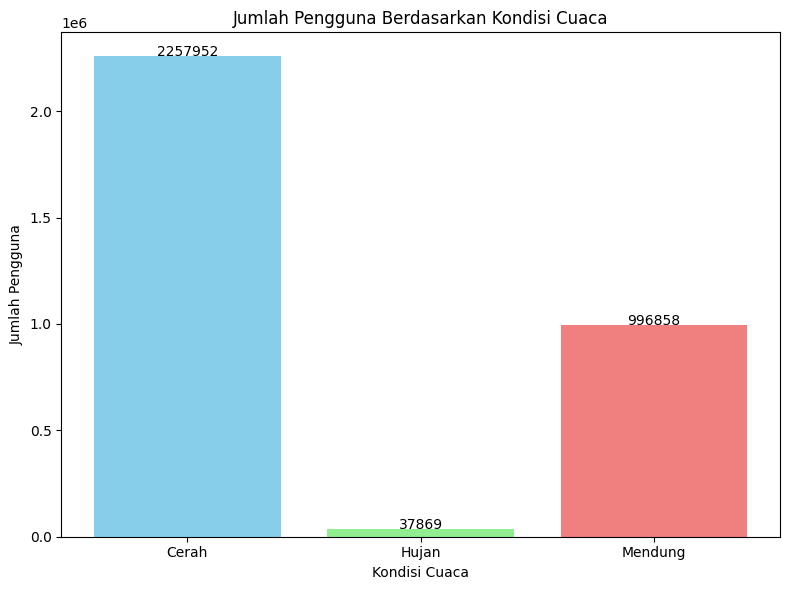

In [49]:
weather_user_count = day_df.groupby('weathersit')['cnt'].sum()

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(8, 6))

# Membuat histogram menggunakan bar chart
ax.bar(weather_user_count.index, weather_user_count, 
       color=['skyblue', 'lightgreen', 'lightcoral', 'yellow'])

# Menambahkan title dan label
ax.set_title(f"Jumlah Pengguna Berdasarkan Kondisi Cuaca")
ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Jumlah Pengguna')

# Menambahkan nilai di atas bar
for i, value in enumerate(weather_user_count):
    ax.text(i, value + 10, f'{value}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

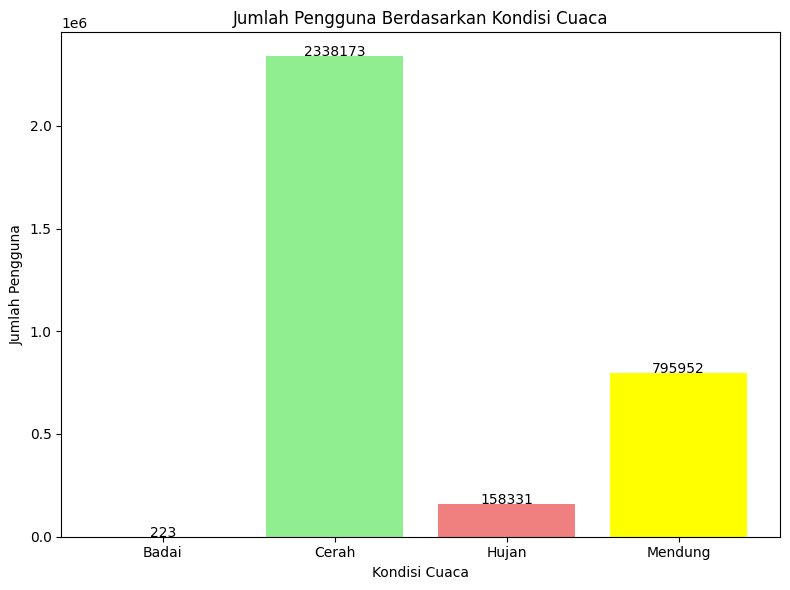

In [53]:
weather_user_count = hour_df.groupby('weathersit')['cnt'].sum()

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(8, 6))

# Membuat histogram menggunakan bar chart
ax.bar(weather_user_count.index, weather_user_count, 
       color=['skyblue', 'lightgreen', 'lightcoral', 'yellow'])

# Menambahkan title dan label
ax.set_title(f"Jumlah Pengguna Berdasarkan Kondisi Cuaca")
ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Jumlah Pengguna')

# Menambahkan nilai di atas bar
for i, value in enumerate(weather_user_count):
    ax.text(i, value + 10, f'{value}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Insight**
- Pada range tahun 2011 sampai 2012 cenderung berkondisi cuaca cerah

### Pertanyaa 2 : 

### Mengetahui Trend Penggunaan Sepeda pada 6 bulan terakhir dengan Menggunakan RFM

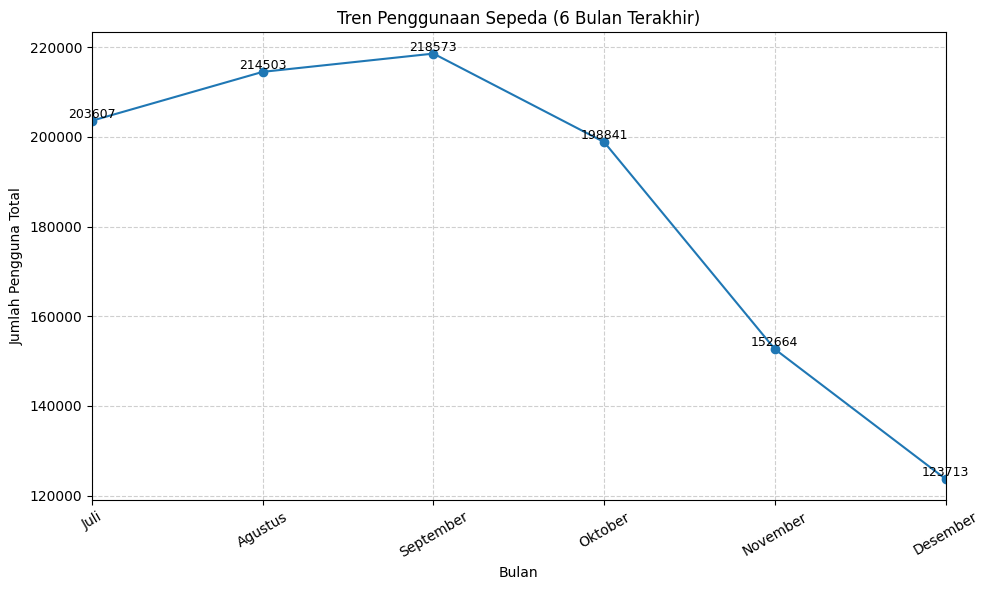

In [72]:
unstable_weather_df = hour_df[hour_df['weathersit'].isin(["Mendung", "Hujan", "Badai"])]
reference_date = pd.Timestamp("2012-12-31")  # Tanggal acuan

rfm = unstable_weather_df.groupby('id_pengguna').agg({
    'dteday': lambda x: (reference_date - x.max()).days,  # Recency
    'id_pengguna': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).rename(columns={'dteday': 'Recency', 'id_pengguna': 'Frequency', 'cnt': 'Monetary'})


recent_months_df = hour_df[hour_df['dteday'] >= pd.Timestamp("2012-07-01")]
usage_trend = recent_months_df.groupby(recent_months_df['dteday'].dt.month)['cnt'].sum()

# Periksa index data
usage_trend.index = range(1, len(usage_trend) + 1)

# Plot tren penggunaan sepeda
plt.figure(figsize=(10, 6))
usage_trend.plot(kind='line', marker='o', title='Tren Penggunaan Sepeda (6 Bulan Terakhir)')

plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 7), labels=['Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=30)
plt.xlim(1, 6)

plt.ylabel('Jumlah Pengguna Total')
plt.grid(True, linestyle='--', alpha=0.6)

for month, value in usage_trend.items():
    plt.text(month, value, str(value), fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()



#

### Conclusion

#### Pertanyaan 1 :
##### Dari linechart di atas, dapat dianalisis bahwa penggunaan sepeda terjadi secara fluktuatif alias jumlahnya mengikuti kondisi kemungkinan yang lain (seperti cuaca, jam sibuk, dan lainnya)

#### Pertanyaan 2 :
##### Di beberapa bulan terakhir, dengan menggunakan metode RFM dapat dilihat bahwa terjadi penurunan jumlah penggunaan sepeda secara signifikan, dapat dipengaruhi oleh cuaca, jam sibuk, dan lainnya

## **Tujuan Dari Tekni Analisis**
- Untuk mencari trend-trend tertentu agar dapat dianalisis pola-polanya untuk rencana kedepan.
- Memberikan insight mengenai data yang ada sebelumnya.
- Membantu memberikan inovasi baru berdasarkan analisis-analisis tersebut.